<a href="https://colab.research.google.com/github/TJ1810/Sentiment-analysis/blob/main/Trading_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'sarif'
%config inlineBackend.figure_format'svg'

<ipython-input-1-9b13f3459448>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
UsageError: Invalid config statement: "inlineBackend.figure_format'svg'", should be `Class.trait = value`.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tr_eikon_eod_data (1).csv to tr_eikon_eod_data (1).csv


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from pylab import mpl, plt

In [ ]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.figsize'] = (8, 6)

In [ ]:
df = pd.read_csv("tr_eikon_eod_data (1).csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2216 non-null   object 
 1   AAPL.O  2138 non-null   float64
 2   MSFT.O  2138 non-null   float64
 3   INTC.O  2138 non-null   float64
 4   AMZN.O  2138 non-null   float64
 5   GS.N    2138 non-null   float64
 6   SPY     2138 non-null   float64
 7   .SPX    2138 non-null   float64
 8   .VIX    2138 non-null   float64
 9   EUR=    2216 non-null   float64
 10  XAU=    2211 non-null   float64
 11  GDX     2138 non-null   float64
 12  GLD     2138 non-null   float64
dtypes: float64(12), object(1)
memory usage: 225.2+ KB


In [ ]:
df.head()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
0,01/01/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
1,04/01/2010,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2,05/01/2010,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
3,06/01/2010,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
4,07/01/2010,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [ ]:
df.tail()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
2211,25/06/2018,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2212,26/06/2018,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2213,27/06/2018,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2214,28/06/2018,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2215,29/06/2018,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


In [ ]:
df.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [ ]:
df.mean()

<ipython-input-9-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [ ]:
df.aggregate([min,
              np.mean,
              np.std,
              np.median,
              max]
).round(2)

<ipython-input-10-0abe099c5f25>:1: FutureWarning: ['Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.aggregate([min,


,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,01/01/2010,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,NaN,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,NaN,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,NaN,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,31/12/2015,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [ ]:
symbol = 'AAPL.O'

In [ ]:
df = (
    pd.DataFrame(df[symbol])
    .dropna()
)

Trading strategy

In [ ]:
SMA1 = 42
SMA2 = 252

In [ ]:
df['SMA1'] = df[symbol].rolling(SMA1).mean()
df['SMA2'] = df[symbol].rolling(SMA2).mean()

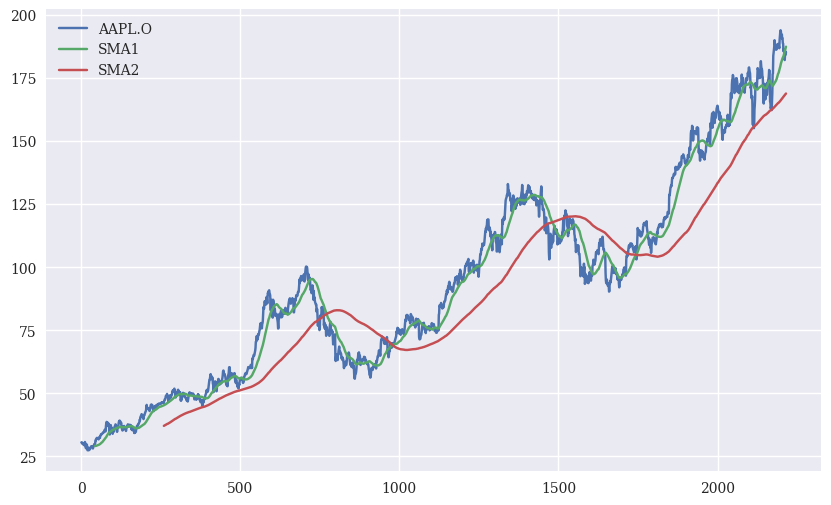

In [ ]:
df.plot(figsize=(10, 6));

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Position'] = np.where(df['SMA1'] > df['SMA2'], 1, -1)

In [ ]:
df.tail()

,AAPL.O,SMA1,SMA2,Position
2211,182.17,185.606190,168.265556,1
2212,184.43,186.087381,168.418770,1
2213,184.16,186.607381,168.579206,1
2214,185.50,187.089286,168.736627,1
2215,185.11,187.470476,168.901032,1


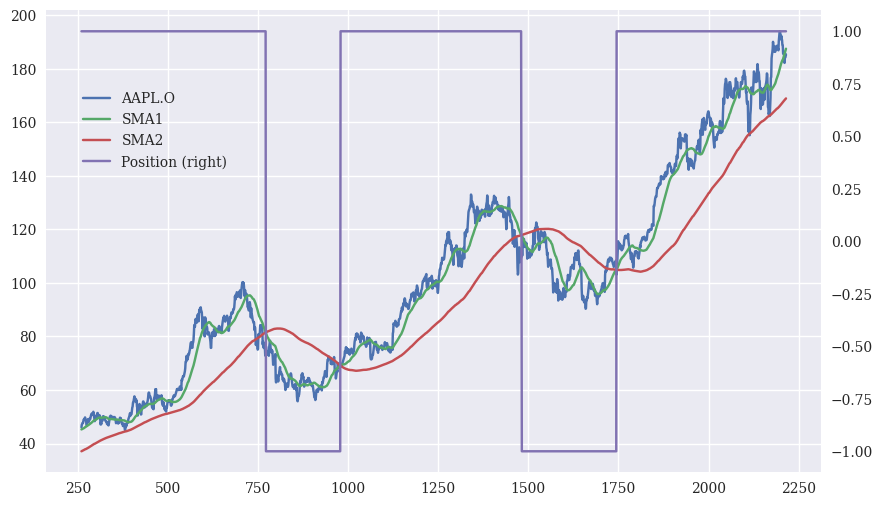

In [ ]:
ax = df.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));


Vectorized Backtesting

In [ ]:
df['Returns'] = np.log(df[symbol] / df[symbol].shift(1))

In [ ]:
df['Strategy'] = df['Position'].shift(1) * df['Returns']

In [ ]:
df.round(4).head()

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
260,46.0800,45.2810,37.1207,1,NaN,NaN
261,47.0814,45.3497,37.1862,1,0.0215,0.0215
262,47.3271,45.4126,37.2525,1,0.0052,0.0052
263,47.7142,45.4661,37.3223,1,0.0081,0.0081
264,47.6757,45.5226,37.3921,1,-0.0008,-0.0008


In [ ]:
df.dropna(inplace=True)

In [ ]:
np.exp(df[['Returns', 'Strategy' ]].sum())

Returns     4.017148
Strategy    5.811299
dtype: float64

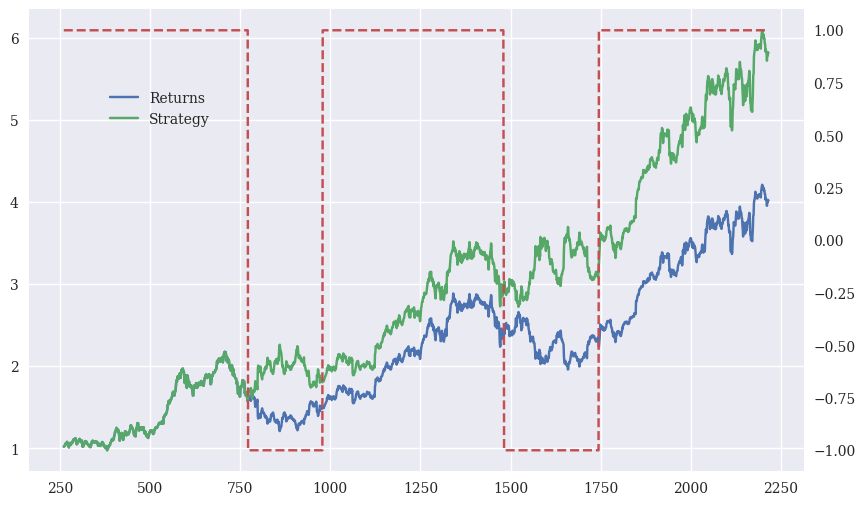

In [ ]:
ax = df[['Returns', 'Strategy']].cumsum(
      ).apply(np.exp).plot(figsize=(10, 6))
df['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));



optimization

In [ ]:
from itertools import product

In [ ]:
sma1 = range(20, 61, 4)
sma2 = range(180, 281, 10)

In [ ]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    df = pd.DataFrame(df[symbol])
    df.dropna(inplace=True)
    df['Returns'] = np.log(df[symbol] / df[symbol].shift(1))
    df['SMA1'] = df[symbol].rolling(SMA1).mean()
    df['SMA2'] = df[symbol].rolling(SMA2).mean()
    df.dropna(inplace=True)
    df['Position'] = np.where(df['SMA1'] > df['SMA2'], 1, -1)
    df['Strategy'] = df['Position'].shift(1) * df['Returns']
    df.dropna(inplace=True)
    perf = np.exp(df[['Returns', 'Strategy' ]].sum())
    results = results .append(pd.DataFrame(
        {'SMA1': SMA1, 'SMA2': SMA2,
         'MARKET': perf['Returns'],
         'STRATEGY': perf['Strategy'],
         'OUT': perf['Strategy'] - perf['Returns']},
        index=[0]), ignore_index=True)


<ipython-input-28-0a0c37c616e1>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results .append(pd.DataFrame(
<ipython-input-28-0a0c37c616e1>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results .append(pd.DataFrame(
<ipython-input-28-0a0c37c616e1>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results .append(pd.DataFrame(
<ipython-input-28-0a0c37c616e1>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results .append(pd.DataFrame(
<ipython-input-28-0a0c37c616e1>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      121 non-null    int64  
 1   SMA2      121 non-null    int64  
 2   MARKET    121 non-null    float64
 3   STRATEGY  121 non-null    float64
 4   OUT       121 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [ ]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
1,20,190,2.212192,2.878900,0.666709
3,20,210,2.493402,2.797301,0.303899
5,20,230,1.558427,1.837796,0.279369
0,20,180,3.147903,3.400238,0.252335
4,20,220,1.639012,1.855942,0.216930
84,48,250,1.000000,1.000000,0.000000
79,48,200,1.000000,1.000000,0.000000


Random Walk Hypothesis

In [ ]:
df = pd.read_csv("tr_eikon_eod_data (1).csv")

In [ ]:
df.aggregate([min,
              np.mean,
              np.std,
              np.median,
              max]
).round(2)

<ipython-input-32-0abe099c5f25>:1: FutureWarning: ['Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.aggregate([min,


,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,01/01/2010,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,NaN,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,NaN,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,NaN,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,31/12/2015,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [ ]:
symbol = '.SPX'

In [ ]:
df = pd.DataFrame(df[symbol])

In [ ]:
lags = 5
cols = []
for lag in range(1, lags + 1):
  col = 'lag_{}'.format(lag)
  df[col] = df[symbol].shift(lag)
  cols.append(col)

In [ ]:
df.head(7)

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1132.99,NaN,NaN,NaN,NaN,NaN
2,1136.52,1132.99,NaN,NaN,NaN,NaN
3,1137.14,1136.52,1132.99,NaN,NaN,NaN
4,1141.69,1137.14,1136.52,1132.99,NaN,NaN
5,1144.98,1141.69,1137.14,1136.52,1132.99,NaN
6,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99


In [ ]:
 df.dropna(inplace=True)

In [ ]:
reg = np.linalg.lstsq(df[cols], df[symbol], rcond=-1)[0]

In [ ]:
df['Prediction'] = np.dot(df[cols], reg)

In [ ]:
reg.round(3)

array([0.966, 0.005, 0.025, 0.   , 0.003])

(<BarContainer object of 5 artists>,)

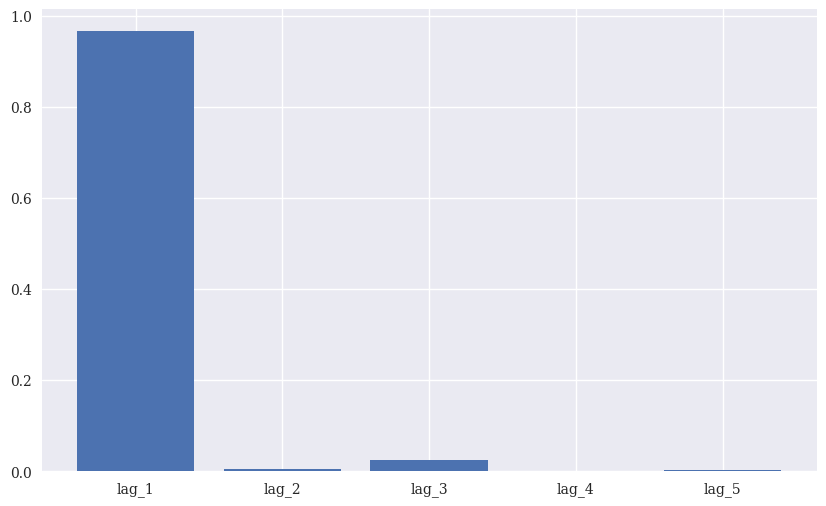

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(cols, reg),

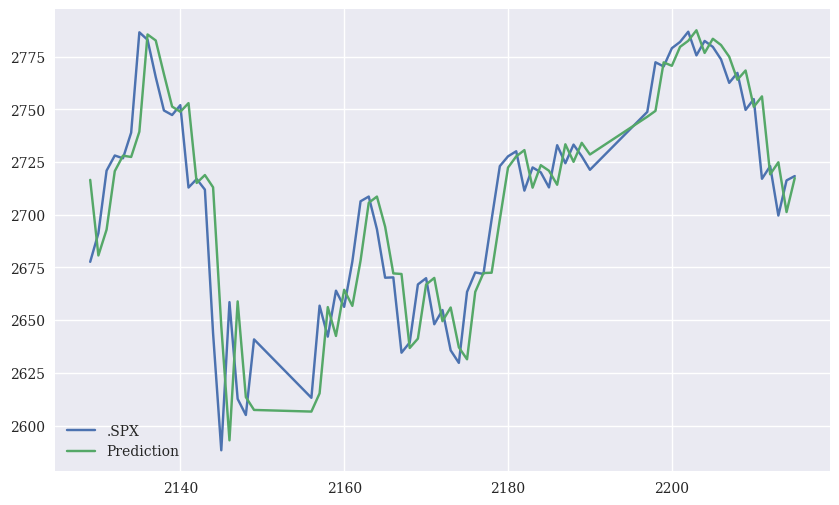

In [ ]:
df[[symbol, 'Prediction']].iloc[-75:].plot(figsize=(10, 6));


trading strategy

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from pylab import mpl, plt
import warnings


In [ ]:
warnings.simplefilter('ignore')
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
%config InlineBackend.figure_format = 'svg'



Linear OLS regression

In [ ]:
df = pd.read_csv("tr_eikon_eod_data (1).csv")

In [ ]:
df.columns

Index(['Date', 'AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX',
       '.VIX', 'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [ ]:
symbol = 'EUR='

In [ ]:
df = pd.DataFrame(df[symbol])

In [ ]:
df['returns'] = np.log(df / df.shift(1))

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['direction'] = np.sign(df['returns']).astype(int)

In [ ]:
df.head()

,.SPX,returns,direction
2,1136.52,0.003111,1
3,1137.14,0.000545,1
4,1141.69,0.003993,1
5,1144.98,0.002878,1
6,1146.98,0.001745,1


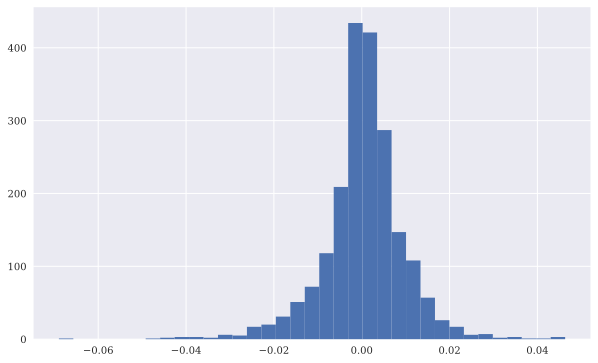

In [ ]:
df['returns'].hist(bins=35, figsize=(10, 6));

In [ ]:
lags = 2

In [ ]:
def create_lags(df):
  global cols
  cols = []
  for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    df[col] = df['returns'].shift(lag)
    cols.append(col)

In [ ]:
create_lags(df)

In [ ]:
df.head()

,.SPX,returns,direction,lag_1,lag_2
2,1136.52,0.003111,1,NaN,NaN
3,1137.14,0.000545,1,0.003111,NaN
4,1141.69,0.003993,1,0.000545,0.003111
5,1144.98,0.002878,1,0.003993,0.000545
6,1146.98,0.001745,1,0.002878,0.003993


In [ ]:
df.dropna(inplace=True)

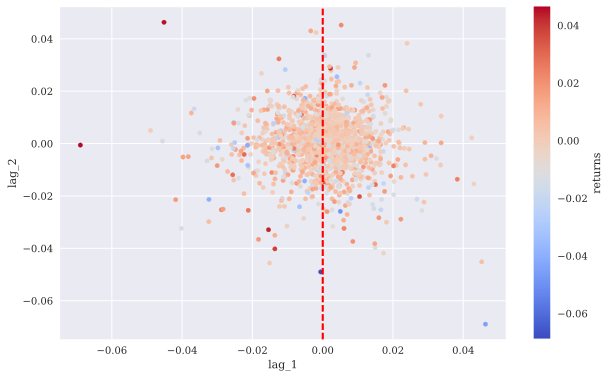

In [ ]:
df.plot.scatter(x='lag_1', y='lag_2', c='returns',
                cmap='coolwarm', figsize=(10,6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axvline(0, c='r', ls='--');


Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
df['pos_ols_1'] = model.fit(df[cols], df['returns']).predict(df[cols])

In [ ]:
df['pos_ols_2'] = model.fit(df[cols], df['returns']).predict(df[cols])

In [ ]:
df[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
4,0.000447,0.000447
5,0.000220,0.000220
6,0.000354,0.000354
7,0.000383,0.000383
8,0.000899,0.000899


In [ ]:
df[['pos_ols_1', 'pos_ols_2']] = np.where(
    df[['pos_ols_1', 'pos_ols_2']] >0, 1, -1)

In [ ]:
df['pos_ols_1'].value_counts()

 1    1708
-1     351
Name: pos_ols_1, dtype: int64

In [ ]:
df['pos_ols_2'].value_counts()

 1    1708
-1     351
Name: pos_ols_2, dtype: int64

In [ ]:
(df['pos_ols_1'].diff() != 0).sum()

638

In [ ]:
(df['pos_ols_2'].diff() != 0).sum()

638

In [ ]:
df['strat_ols_1'] = df['pos_ols_1'] * df['returns']

In [ ]:
df['strat_ols_2'] = df['pos_ols_2'] * df['returns']

In [ ]:
df[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        2.238724
strat_ols_1    2.309798
strat_ols_2    2.309798
dtype: float64

In [ ]:
(df['direction'] == df['pos_ols_1']).value_counts()

True     1122
False     937
dtype: int64

In [ ]:
(df['direction'] == df['pos_ols_2']).value_counts()

True     1122
False     937
dtype: int64

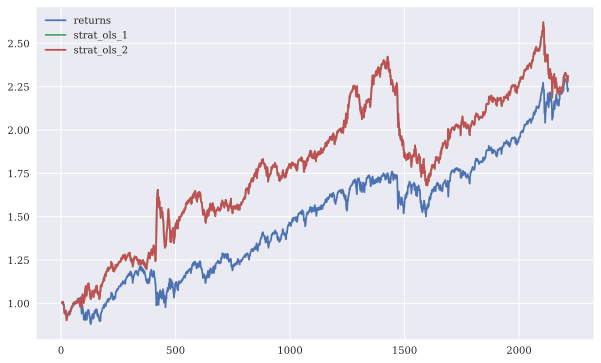

In [ ]:
df[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum(
    ).apply(np.exp).plot(figsize=(10, 6));

clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=2, random_state=0)

In [ ]:
model.fit(df[cols])

KMeans(n_clusters=2, random_state=0)

In [ ]:
df['pos_clus'] = model.predict(df[cols])

In [ ]:
df['pos_clus'] = np.where(df['pos_clus'] == 1, -1, 1)

In [ ]:
df['pos_clus'].values

array([-1,  1, -1, ...,  1, -1,  1])

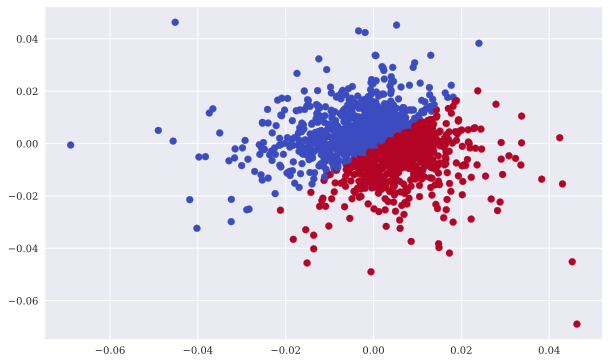

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df[cols].iloc[:, 0], df[cols].iloc[:, 1],
            c=df['pos_clus'], cmap='coolwarm');


Frequency approach

In [ ]:
def create_bins(df, bins=[0]):
  global cols_bin
  cols_bin = []
  for col in cols:
    col_bin = col + '_bin'
    df[col_bin] = np.digitize(df[col], bins=bins)
    cols_bin.append(col_bin)

In [ ]:
create_bins(df)

In [ ]:
df[cols_bin + ['direction']].head()

,lag_1_bin,lag_2_bin,direction
4,1,1,1
5,1,1,1
6,1,1,1
7,1,1,-1
8,0,1,1


In [ ]:
grouped = df.groupby(cols_bin + ['direction'])
grouped.size()

lag_1_bin  lag_2_bin  direction
0          0          -1           167
                       1           233
           1          -1           233
                       0             1
                       1           301
1          0          -1           250
                       1           285
           1          -1           285
                       1           304
dtype: int64

classification algorithms

In [ ]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
C = 1

In [ ]:
models = {
    'log_reg': linear_model.LogisticRegression(C=C),
    'gauss_nb': GaussianNB(),
    'svm': SVC(C=C)
}

In [ ]:
def fit_models(df):
  mfit = {model: models[model].fit(df[cols_bin], df['direction'])
          for model in models.key()}

In [ ]:
fit_models(df)

AttributeError: ignored

In [ ]:
def derive_positions(df):
  for model in

SyntaxError: ignored

In [ ]:
derive_positions(df)

NameError: ignored

DNN

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=2 * [250], random_state=1)

In [ ]:
%time model.fit(df[cols_bin], df['direction'])

CPU times: user 2.29 s, sys: 1.75 s, total: 4.04 s
Wall time: 2.19 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[250, 250], random_state=1,
              solver='lbfgs')

In [ ]:
df['pos_dnn_sk'] = model.predict(df[cols_bin])

In [ ]:
df['strat_dnn_sk'] = df['pos_dnn_sk'] * df['returns']

In [ ]:
df[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns         2.238724
strat_dnn_sk    2.238724
dtype: float64

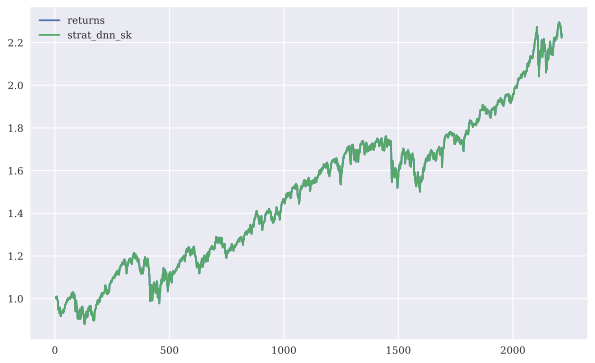

In [ ]:
df[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.5, random_state=100)

In [ ]:
train = train.copy().sort_index()

In [ ]:
test = train.copy().sort_index()

In [ ]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500,
                        hidden_layer_sizes=2 * [250], random_state=1)

In [ ]:
%time model.fit(df[cols_bin], df['direction'])

CPU times: user 2.24 s, sys: 1.42 s, total: 3.66 s
Wall time: 2.91 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[250, 250], max_iter=500,
              random_state=1, solver='lbfgs')

In [ ]:
test['pos_dnn_sk'] = model.predict(test[cols_bin])

In [ ]:
test['strat_dnn_sk'] = test['pos_dnn_sk'] * test['returns']

In [ ]:
test[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns         1.821721
strat_dnn_sk    1.821721
dtype: float64

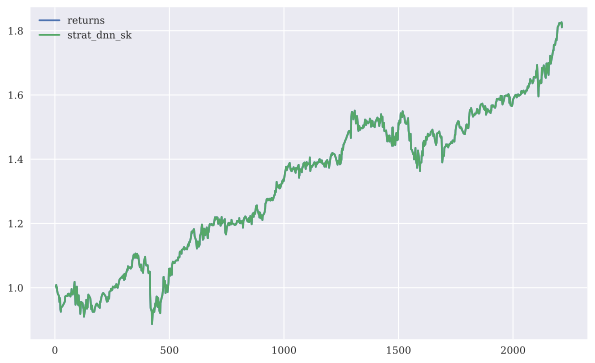

In [ ]:
test[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6));

DNN with keras and tensorflow backend

In [ ]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
def create_model():
  np.random.seed(100)
  tf.rondom.set_seed(100)
  model = Sequential()
  model.add(Dense(16, activation='relu', input_dim = lags))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='rmsprop',
                metrics=['accuracy'])
  return model


In [ ]:
df_ = (df - df.mean()) / df.std()
df['direction_'] = np.where(df['direction'] == 1, 1, 0)

In [ ]:
from sklearn.linear_model import LinearRegression

def create_model():
    # Create a linear regression model
    model = LinearRegression()
    return model

# Call the create_model function to create the model
model = create_model()

In [ ]:
model.evaluate(data_[cols], df['direction_'])

AttributeError: ignored

In [ ]:
pred = np.where(model.predict(df_[cols]) > 0.5, 1, 0)
pred[:10].flatten()

NotFittedError: ignored

In [ ]:
df['pos_dnn_ke'] = np.where(pred > 0, 1, -1)

In [ ]:
df['strat_dnn_ke'] = df['pos_dnn_ke'] * df['returns']

In [ ]:
df[['returns', 'strat_dnn_ke']].sum().apply(np.exp)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the columns 'returns' and 'strat_dnn_ke'

# Calculate the cumulative sum of the columns and apply the exponential function
cumulative_sum = df[['returns', 'strat_dnn_ke']].cumsum().apply(np.exp)

# Plot the results
plt.figure(figsize=(10, 6))
cumulative_sum.plot()
plt.xlabel('Time')
plt.ylabel('Cumulative Sum (Exponential)')
plt.title('Cumulative Sum of Returns and strat_dnn_ke')
plt.show()

KeyError: ignored